### Построение логистической регресии для SPFD

In [1]:
# Импорты библиотек
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import itertools 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Построение матрицы ошибок
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Матрица ошибок', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Реальность', fontsize = 16)
    plt.xlabel('Прогноз', fontsize = 16)

In [3]:
# чтение данных из файла 
spfd = pd.read_csv('SPFD.csv')
spfd = spfd.dropna()
spfd

,StD,TM,PF
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0
...,...,...,...
995,6,22,1
996,9,30,1
997,3,39,0
998,7,25,1


In [4]:
spfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   StD     1000 non-null   int64
 1   TM      1000 non-null   int64
 2   PF      1000 non-null   int64
dtypes: int64(3)
memory usage: 31.2 KB


### ФАЙЛ SPFD.csv: 
### первые два столбца - время, потраченное на подготовку (на занятиях и самостоятельно) - X 
### в третьем столбце - результат экзамена - y

In [5]:
# Выделение признаков
X = spfd.loc[:, ["StD", "TM"]]
X

,StD,TM
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42
...,...,...
995,6,22
996,9,30
997,3,39
998,7,25


In [6]:
# Выделение целевой переменной
y = spfd.loc[:, ["PF"]]
y

,PF
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,0
998,1


### Выделение обучающей и тестовой выборок и построение модели

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [8]:
y_test

,PF
993,0
859,1
298,1
553,0
672,0
...,...
167,0
998,1
984,0
491,0


### Проверка модели на тестовой выборке и анализ точности классификации

In [9]:
y_pred = logreg.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = ['PF'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(logreg.score(X_test, y_test)))

Точность логистической регрессии на тестовой выборке: 0.97


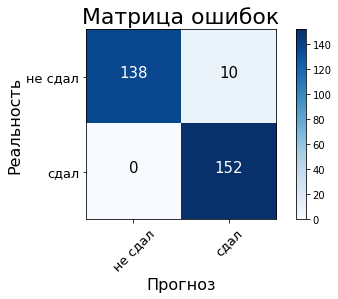

In [10]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['не сдал', 'сдал'], normalize = False)

## С точностью 97% на тестовой выборке модель способна предсказать сдачу экзамена в зависимости от потраченного времени на подготовку, как на занятиях, так и самостоятельно. В 290 случаях модель предсказала правильно, в 10 ошиблась.

### Построение логистической регресии для bank

In [11]:
# чтение данных из файла 
bank = pd.read_excel('bank.xlsx')
bank = bank.dropna()
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [12]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [13]:
# Преобразование данных в числовой вид
lb = LabelEncoder() 
bank['y'] = lb.fit_transform(bank['y'])
bank['job'] = lb.fit_transform(bank['job'])
bank['marital'] = lb.fit_transform(bank['marital'])
bank['education'] = lb.fit_transform(bank['education'])
bank['default'] = lb.fit_transform(bank['default'])
bank['housing'] = lb.fit_transform(bank['housing'])
bank['loan'] = lb.fit_transform(bank['loan'])
bank['contact'] = lb.fit_transform(bank['contact'])
bank['poutcome'] = lb.fit_transform(bank['poutcome'])

In [14]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,oct,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,may,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,apr,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,jun,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,may,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,jul,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,may,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,aug,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,feb,129,4,211,3,1,0


In [15]:
# Выделение целевой переменной
y_bank = bank.loc[:, ["y"]]

In [16]:
y_bank

,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [17]:
# Выделение признаков
X_bank = bank.loc[:, 
             ["age","job", "marital", "education", "default", "balance", 
              "housing", "loan", "contact","duration","campaign", 
              "pdays","previous","poutcome"]] ## без day и month

In [18]:
X_bank

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,129,4,211,3,1


In [19]:
# Выделение обучающей и тестовой выборок
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X_bank, y_bank, test_size=0.3, random_state=0)
X_test_bank

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
4274,35,1,1,0,0,378,1,0,2,427,3,-1,0,3
72,31,4,2,2,0,6248,1,0,2,154,2,-1,0,3
1065,30,10,1,2,0,0,1,0,0,756,1,-1,0,3
3185,42,0,1,1,0,529,1,1,0,193,3,-1,0,3
130,41,1,1,0,0,168,1,0,0,187,3,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,34,9,2,2,0,992,1,0,0,301,1,88,2,2
2663,56,2,1,3,0,575,0,0,2,18,2,-1,0,3
4455,50,1,1,1,0,181,1,0,0,599,2,-1,0,3
3059,56,3,1,0,0,306,0,1,0,212,1,-1,0,3


In [20]:
# Построение модели
# lr = LogisticRegression(max_iter=10000)
lr = LogisticRegression(solver='liblinear', C=0.05,random_state=0, max_iter=10000)
lr.fit(X_train_bank, y_train_bank.values.ravel())

LogisticRegression(C=0.05, max_iter=10000, random_state=0, solver='liblinear')

In [21]:
# Предсказание и анализ точности
y_pred_bank = lr.predict(X_test_bank)
y_pred_bank = pd.DataFrame(y_pred_bank, columns = ['y'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(lr.score(X_test_bank, y_test_bank)))

Точность логистической регрессии на тестовой выборке: 0.88


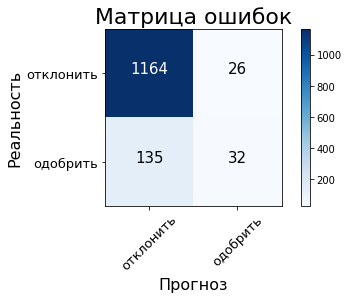

In [22]:
cmx = confusion_matrix(y_test_bank, y_pred_bank, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cmx, classes = ['отклонить', 'одобрить'], normalize = False)

## С точностью 88% на тестовой выборке модель способна предсказать выдачу кредита. В 1196 случаях модель предсказала правильно, в 161 ошиблась.

In [23]:
# Использование кросс-валидации слегка улучшает результат
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train_bank, y_train_bank.values.ravel(), cv=3)
print("Точность %0.2f при стандартном отклонении %0.2f" % (scores.mean(), scores.std()))

Точность 0.90 при стандартном отклонении 0.01


In [24]:
# кросс-валидация по-другому
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
sc = cross_val_score(lr, X_train_bank, y_train_bank.values.ravel(), cv=cv)
print("Точность %0.2f при стандартном отклонении %0.2f" % (sc.mean(), sc.std()))

Точность 0.90 при стандартном отклонении 0.00


## Дополнения
### Изменился способ кодировки категориальных признаков
### Протестированы различные виды регуляризаций/без

In [25]:
# В варианте выше был использован кодировщик sklearn.preprocessing.LabelEncoder, 
# который каждой категории сопоставляет некоторое целое число 
# Здесь же кодируем по-другому

In [26]:
# чтение данных из файла 
bankData = pd.read_excel('bank.xlsx')
bankData = bankData.dropna()
bankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [27]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [28]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [29]:
# Заменяем yes/no на 1/0
bankData.default.replace(('yes', 'no'), (1, 0), inplace=True)
bankData.housing.replace(('yes', 'no'), (1, 0), inplace=True)
bankData.loan.replace(('yes', 'no'), (1, 0), inplace=True)
bankData.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [30]:
bankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [31]:
# Convert categorical variable into dummy/indicator variables.
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    conc = pd.concat([original_dataframe, dummies], axis=1)
    res = conc.drop([feature_to_encode], axis=1)
    return res 

In [32]:
bank_new = encode_and_bind(bankData, 'job')
bank_new = encode_and_bind(bank_new, 'marital')
bank_new = encode_and_bind(bank_new, 'education')
bank_new = encode_and_bind(bank_new, 'contact')
bank_new = encode_and_bind(bank_new, 'poutcome')
bank_new = encode_and_bind(bank_new, 'month')

In [33]:
bank_new

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,0,0,0,1,0,0,0,0,0,0
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4518,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,0,1137,0,0,6,129,4,211,3,...,0,1,0,0,0,0,0,0,0,0


In [34]:
bank_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_admin.           4521 non-null   uint8
 12  job_blue-collar      4521 non-null   uint8
 13  job_entrepreneur     4521 non-null   uint8
 14  job_housemaid        4521 non-null   uint8
 15  job_management       4521 non-null   uint8
 16  job_retired          452

In [35]:
# Выделение целевой переменной
y_bank_new = bank_new.loc[:, ["y"]]
y_bank_new

,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [36]:
# Выделение признаков
X_bank_new = bank_new.loc[:, ~bank_new.columns.isin(['y'])] #all except y
X_bank_new

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,-1,0,...,0,0,0,1,0,0,0,0,0,0
4517,57,1,-3313,1,1,9,153,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4518,57,0,295,0,0,19,151,11,-1,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,0,1137,0,0,6,129,4,211,3,...,0,1,0,0,0,0,0,0,0,0


In [37]:
# Выделение обучающей и тестовой выборок
X_train_bank_new, X_test_bank_new, y_train_bank_new, y_test_bank_new = train_test_split(
    X_bank_new, y_bank_new, test_size=0.3, random_state=0)
X_test_bank_new

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
4274,35,0,378,1,0,16,427,3,-1,0,...,0,0,0,0,0,0,1,0,0,0
72,31,0,6248,1,0,9,154,2,-1,0,...,0,0,0,0,0,0,1,0,0,0
1065,30,0,0,1,0,18,756,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
3185,42,0,529,1,1,19,193,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
130,41,0,168,1,0,18,187,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,34,0,992,1,0,4,301,1,88,2,...,0,0,0,0,0,0,1,0,0,0
2663,56,0,575,0,0,20,18,2,-1,0,...,0,0,0,0,1,0,0,0,0,0
4455,50,0,181,1,0,17,599,2,-1,0,...,0,0,0,0,0,0,0,0,0,0
3059,56,0,306,0,1,8,212,1,-1,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# Построение модели
lr = LogisticRegression(solver='liblinear', C=0.05,random_state=0, max_iter=10000)
lr.fit(X_train_bank_new, y_train_bank_new.values.ravel())

LogisticRegression(C=0.05, max_iter=10000, random_state=0, solver='liblinear')

In [39]:
# Предсказание и анализ точности
y_pred_bank_new = lr.predict(X_test_bank_new)
y_pred_bank_new = pd.DataFrame(y_pred_bank_new, columns = ['y'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(lr.score(X_test_bank_new, y_test_bank_new)))

Точность логистической регрессии на тестовой выборке: 0.89


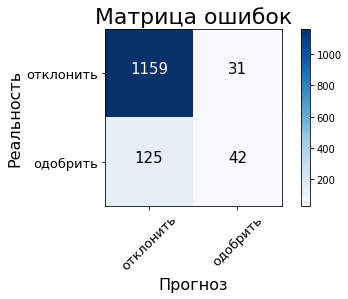

In [40]:
cmx = confusion_matrix(y_test_bank_new, y_pred_bank_new, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cmx, classes = ['отклонить', 'одобрить'], normalize = False)

Какой вид регуляризации использует каждый из алгоритмов:

‘newton-cg’, ‘sag’, and ‘lbfgs’ поддерживают только L2 регуляризацию или без неё.

‘liblinear’ поддерживает обе L1 и L2 регуляризации

Elastic-Net регуляризация поддерживается только ‘saga’

penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’

L1 регуляризация, liblinear
Точность логистической регрессии на тестовой выборке: 0.89


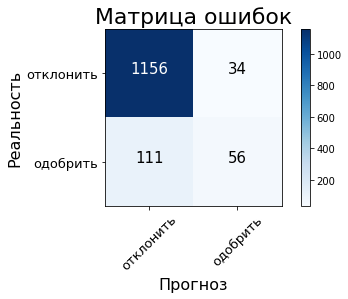

In [41]:
print('L1 регуляризация, liblinear')
lr = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lr.fit(X_train_bank_new, y_train_bank_new.values.ravel())
# Предсказание и анализ точности
y_pred_bank_new = lr.predict(X_test_bank_new)
y_pred_bank_new = pd.DataFrame(y_pred_bank_new, columns = ['y'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(lr.score(X_test_bank_new, y_test_bank_new)))
cmx = confusion_matrix(y_test_bank_new, y_pred_bank_new, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cmx, classes = ['отклонить', 'одобрить'], normalize = False)

L2 регуляризация, liblinear
Точность логистической регрессии на тестовой выборке: 0.90


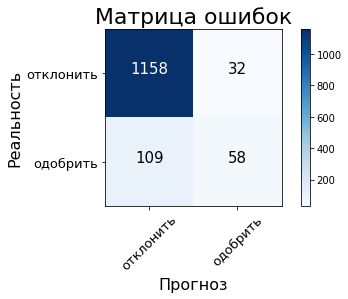

In [42]:
print('L2 регуляризация, liblinear')
lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
lr.fit(X_train_bank_new, y_train_bank_new.values.ravel())
# Предсказание и анализ точности
y_pred_bank_new = lr.predict(X_test_bank_new)
y_pred_bank_new = pd.DataFrame(y_pred_bank_new, columns = ['y'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(lr.score(X_test_bank_new, y_test_bank_new)))
cmx = confusion_matrix(y_test_bank_new, y_pred_bank_new, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cmx, classes = ['отклонить', 'одобрить'], normalize = False)

elasticnet регуляризация, saga
Точность логистической регрессии на тестовой выборке: 0.88


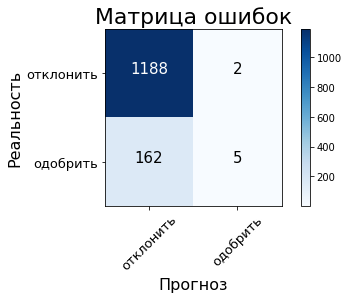

In [43]:
print('elasticnet регуляризация, saga')
lr = LogisticRegression(penalty='elasticnet', solver='saga',  l1_ratio=0.7, max_iter=10000)
lr.fit(X_train_bank_new, y_train_bank_new.values.ravel())
# Предсказание и анализ точности
y_pred_bank_new = lr.predict(X_test_bank_new)
y_pred_bank_new = pd.DataFrame(y_pred_bank_new, columns = ['y'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(lr.score(X_test_bank_new, y_test_bank_new)))
cmx = confusion_matrix(y_test_bank_new, y_pred_bank_new, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cmx, classes = ['отклонить', 'одобрить'], normalize = False)

l2 регуляризация, newton-cg
Точность логистической регрессии на тестовой выборке: 0.90


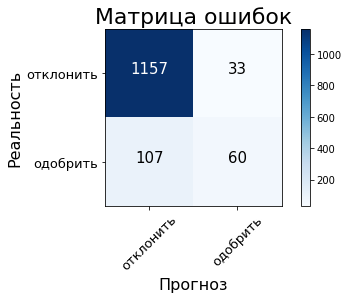

In [44]:
print('l2 регуляризация, newton-cg')
lr = LogisticRegression(solver='newton-cg', max_iter=10000)
lr.fit(X_train_bank_new, y_train_bank_new.values.ravel())
# Предсказание и анализ точности
y_pred_bank_new = lr.predict(X_test_bank_new)
y_pred_bank_new = pd.DataFrame(y_pred_bank_new, columns = ['y'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(lr.score(X_test_bank_new, y_test_bank_new)))
cmx = confusion_matrix(y_test_bank_new, y_pred_bank_new, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cmx, classes = ['отклонить', 'одобрить'], normalize = False)

без регуляризации, newton-cg
Точность логистической регрессии на тестовой выборке: 0.90


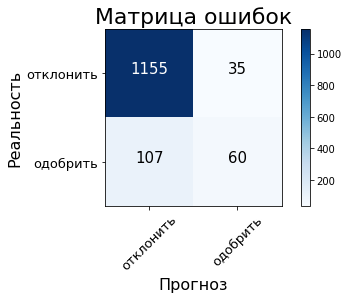

In [45]:
print('без регуляризации, newton-cg')
lr = LogisticRegression(penalty='none', solver='newton-cg', max_iter=10000)
lr.fit(X_train_bank_new, y_train_bank_new.values.ravel())
# Предсказание и анализ точности
y_pred_bank_new = lr.predict(X_test_bank_new)
y_pred_bank_new = pd.DataFrame(y_pred_bank_new, columns = ['y'])
print('Точность логистической регрессии на тестовой выборке: {:.2f}'.format(lr.score(X_test_bank_new, y_test_bank_new)))
cmx = confusion_matrix(y_test_bank_new, y_pred_bank_new, labels = [0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cmx, classes = ['отклонить', 'одобрить'], normalize = False)